In [1]:
# BATCH 1 – Cleaning First 6 Columns
# Columns: job_id, title, location, department, salary_range, company_profile

import pandas as pd

# Load dataset
df = pd.read_csv("fake_job_postings.csv")


# 1. job_id
# What: Drop this column
# Why: It's just a unique identifier and has no predictive value
# How: Use df.drop()
df.drop(columns=["job_id"], inplace=True)


# 2. title
# What: Clean the job title text
# Why: Case consistency and text normalization
# How: Lowercase + strip spaces + remove punctuation
df['title'] = df['title'].astype(str).str.lower().str.strip()


# 3. location
# What: Extract useful info from messy location strings
# Why: Some locations are missing city or have inconsistent formatting
# How:
#   - Extract country (first part before the first comma)
#   - Optionally extract state
df['country'] = df['location'].astype(str).str.split(',').str[0].str.strip().str.upper()
df['state'] = df['location'].astype(str).str.split(',').str[1].str.strip().str.upper()

# You can drop original location column after extracting
df.drop(columns=['location'], inplace=True)


# 4. department
# What: Drop this column
# Why: Often missing or vague (e.g., "tech", "general"), low information value
# How: drop it
df.drop(columns=['department'], inplace=True)


# 5. salary_range
# What: Create a new feature 'has_salary'
# Why: The salary column is too sparse and inconsistent to fill or convert,
#         but its presence or absence can be a useful indicator
# How:
df['has_salary'] = df['salary_range'].notnull().astype(int)
# Optional: drop original column
df.drop(columns=['salary_range'], inplace=True)


# 6. company_profile
# What: Drop this column
# Why: Usually empty and not directly useful for modeling
df.drop(columns=['company_profile'], inplace=True)


# BATCH 1 CLEANED! Preview and save
print("Batch 1 cleaned. Preview:")
print(df.head())
df.to_csv("cleaned_batch1.csv", index=False)


✅ Batch 1 cleaned. Preview:
                                       title  \
0                           marketing intern   
1  customer service - cloud video production   
2    commissioning machinery assistant (cma)   
3          account executive - washington dc   
4                        bill review manager   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

         

In [7]:
# BATCH 2 – Cleaning Text + Categorical Fields

import re


# 1. description
# What: Clean and standardize job descriptions
# Why: Core signal for model — remove noise, standardize input
# How:
df['description'] = (
    df['description'].astype(str)
    .str.lower()
    .str.replace(r'<.*?>', '', regex=True)   # Remove HTML tags
    .str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)  # Remove punctuation
    .str.replace(r'\s+', ' ', regex=True)   # Remove extra spaces
    .str.strip()
)


# 2. requirements
# What: Clean like description (same reasons)
df['requirements'] = (
    df['requirements'].astype(str)
    .str.lower()
    .str.replace(r'<.*?>', '', regex=True)
    .str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)


# 3. benefits
# What: Fill missing with 'not provided', clean formatting
# Why: Sparse, but presence/absence might hold signal
df['benefits'] = (
    df['benefits'].astype(str)
    .fillna("not provided")
    .str.lower()
    .str.replace(r'<.*?>', '', regex=True)
    .str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)


# 4. employment_type
# What: Clean & normalize
# Why: Categorical feature useful for prediction
df['employment_type'] = (
    df['employment_type']
    .fillna("unknown")
    .str.lower()
    .str.strip()
)


# 5. required_experience
# What: Fill missing, normalize entries
df['required_experience'] = (
    df['required_experience']
    .fillna("not specified")
    .str.lower()
    .str.strip()
)


# 6. required_education
# What: Fill nulls, reduce to general levels
df['required_education'] = (
    df['required_education']
    .fillna("not specified")
    .str.lower()
    .replace({
        "high school or equivalent": "high school",
        "some college coursework completed": "some college",
        "bachelor's degree": "bachelor",
        "master's degree": "master",
        "doctorate": "phd"
    })
)


# BATCH 2 CLEANED! Preview and save
print("Batch 2 cleaned. Preview:")
print(df[['description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education']].head())

df.to_csv("cleaned_batch2.csv", index=False)


Batch 2 cleaned. Preview:
                                         description  \
0  food52 a fastgrowing james beard awardwinning ...   
1  organised focused vibrant awesomedo you have a...   
2  our client located in houston is actively seek...   
3  the company esri environmental systems researc...   
4  job title itemization review managerlocation f...   

                                        requirements  \
0  experience with content management systems a m...   
1  what we expect from youyour key responsibility...   
2  implement precommissioning and commissioning p...   
3  education bachelors or masters in gis business...   
4  qualificationsrn license in the state of texas...   

                                            benefits employment_type  \
0                                                nan           other   
1  what you will get from usthrough being part of...       full-time   
2                                                nan         unknown   
3  our cultu

In [8]:
#BATCH 3 – Cleaning Meta Columns and Target


# 1. industry
# What: Fill nulls and standardize
# Why: May be useful for visualization (optional for model)
df['industry'] = (
    df['industry']
    .fillna("not specified")
    .str.lower()
    .str.strip()
)


# 2. function
# What: Clean like industry
df['function'] = (
    df['function']
    .fillna("not specified")
    .str.lower()
    .str.strip()
)


# 3. telecommuting
# What: Ensure binary 0 or 1, no nulls
df['telecommuting'] = df['telecommuting'].fillna(0).astype(int)


# 4. has_company_logo
# What: Ensure binary 0 or 1, no nulls
df['has_company_logo'] = df['has_company_logo'].fillna(0).astype(int)


# 5. has_questions
# What: Ensure binary 0 or 1, no nulls
df['has_questions'] = df['has_questions'].fillna(0).astype(int)


# 6. fraudulent (target)
# What: Validate only — should be 0 or 1
print("Target column check:\n", df['fraudulent'].value_counts())


# BATCH 3 CLEANED! Preview and save
print("Batch 3 cleaned. Preview:")
print(df[['industry', 'function', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']].head())

# Save final cleaned dataset
df.to_csv("cleaned_final_dataset.csv", index=False)


Target column check:
 fraudulent
0    17014
1      866
Name: count, dtype: int64
Batch 3 cleaned. Preview:
                    industry              function  telecommuting  \
0              not specified             marketing              0   
1  marketing and advertising      customer service              0   
2              not specified         not specified              0   
3          computer software                 sales              0   
4     hospital & health care  health care provider              0   

   has_company_logo  has_questions  fraudulent  
0                 1              0           0  
1                 1              0           0  
2                 1              0           0  
3                 1              0           0  
4                 1              1           0  


In [9]:
# STEP: DATA PROFILING
# Purpose: Understand the structure, cleanliness, and distribution of our cleaned dataset
# Why this is important:
# - To confirm all cleaning steps worked correctly
# - To identify any leftover issues (nulls, inconsistencies, wrong types)
# - To prepare for EDA, feature engineering, and modeling
# Impact:
# - Prevents future model errors
# - Helps catch class imbalance or suspicious fields
# - Guides which columns may need encoding or transformations

import pandas as pd

# Load cleaned dataset
df = pd.read_csv("cleaned_final_dataset.csv")


# 1. General info
print(" Dataset Info:")
df.info()


# 2. Null count check
print("\n Missing Values Per Column:")
print(df.isnull().sum())


# 3. Unique values per column
print("\n Unique Values per Column:")
print(df.nunique().sort_values(ascending=False))


# 4. Sample value counts from key fields
print("\n Target Distribution (fraudulent):")
print(df['fraudulent'].value_counts(normalize=True))

print("\n Employment Type Distribution:")
print(df['employment_type'].value_counts())

print("\n Required Education Distribution:")
print(df['required_education'].value_counts())

print("\n Country Distribution (Top 10):")
print(df['country'].value_counts().head(10))

# Optional: Preview data types and head
print("\n First 5 Rows of Dataset:")
display(df.head())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   description          17878 non-null  object
 2   requirements         15178 non-null  object
 3   benefits             10646 non-null  object
 4   telecommuting        17880 non-null  int64 
 5   has_company_logo     17880 non-null  int64 
 6   has_questions        17880 non-null  int64 
 7   employment_type      17880 non-null  object
 8   required_experience  17880 non-null  object
 9   required_education   17880 non-null  object
 10  industry             17880 non-null  object
 11  function             17880 non-null  object
 12  fraudulent           17880 non-null  int64 
 13  country              17880 non-null  object
 14  state                15300 non-null  object
 15  has_salary           17880 non-null  i

,title,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,has_salary
0,marketing intern,food52 a fastgrowing james beard awardwinning ...,experience with content management systems a m...,NaN,0,1,0,other,internship,not specified,not specified,marketing,0,US,NY,0
1,customer service - cloud video production,organised focused vibrant awesomedo you have a...,what we expect from youyour key responsibility...,what you will get from usthrough being part of...,0,1,0,full-time,not applicable,not specified,marketing and advertising,customer service,0,NZ,NaN,0
2,commissioning machinery assistant (cma),our client located in houston is actively seek...,implement precommissioning and commissioning p...,NaN,0,1,0,unknown,not specified,not specified,not specified,not specified,0,US,IA,0
3,account executive - washington dc,the company esri environmental systems researc...,education bachelors or masters in gis business...,our culture is anything but corporatewe have a...,0,1,0,full-time,mid-senior level,bachelor,computer software,sales,0,US,DC,0
4,bill review manager,job title itemization review managerlocation f...,qualificationsrn license in the state of texas...,full benefits offered,0,1,1,full-time,mid-senior level,bachelor,hospital & health care,health care provider,0,US,FL,0


/tmp/ipython-input-3959117414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fraudulent', palette='Set2')


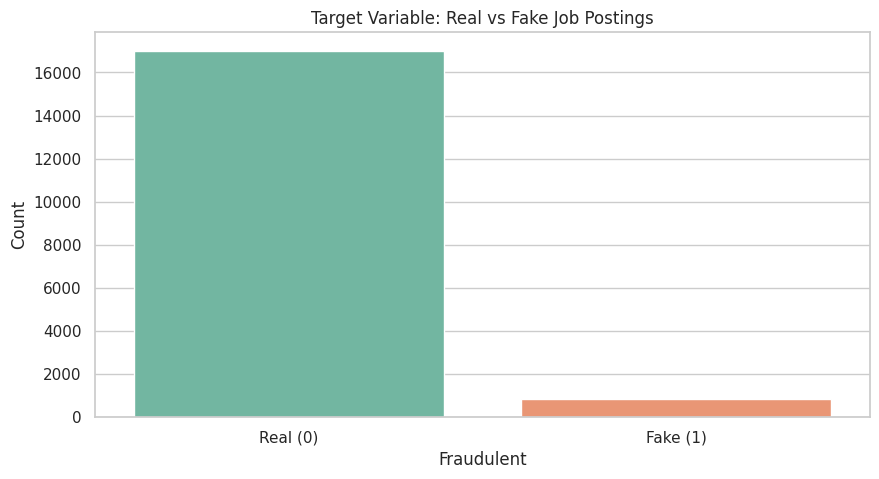

/tmp/ipython-input-3959117414.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette='Blues_d')


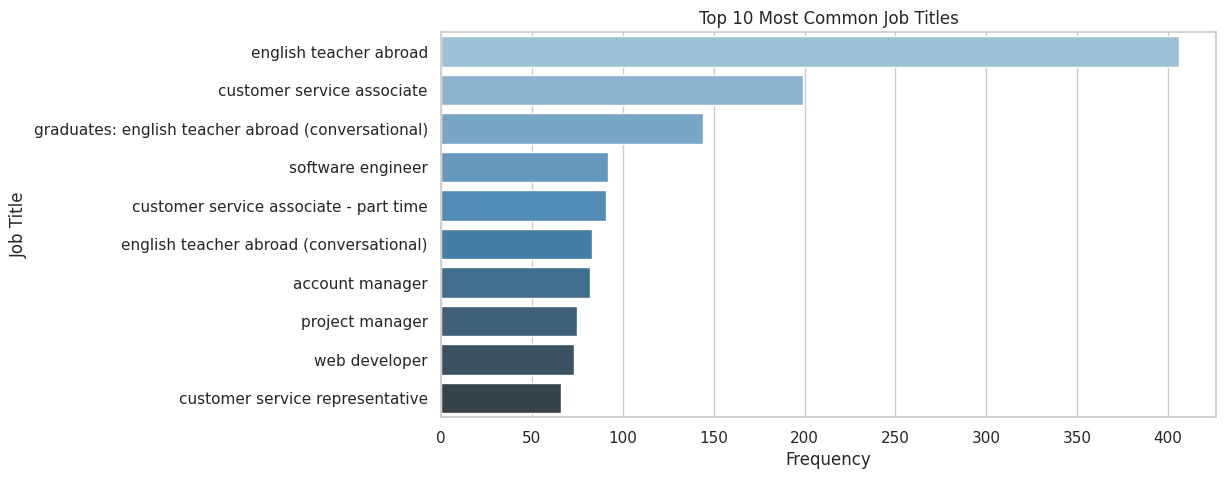

/tmp/ipython-input-3959117414.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='employment_type', order=df['employment_type'].value_counts().index, palette='viridis')


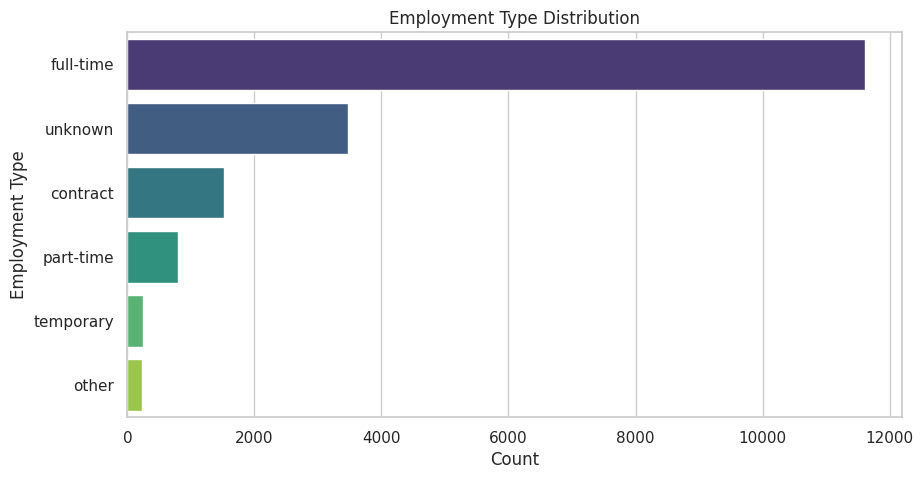

/tmp/ipython-input-3959117414.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='required_education', order=df['required_education'].value_counts().index, palette='mako')


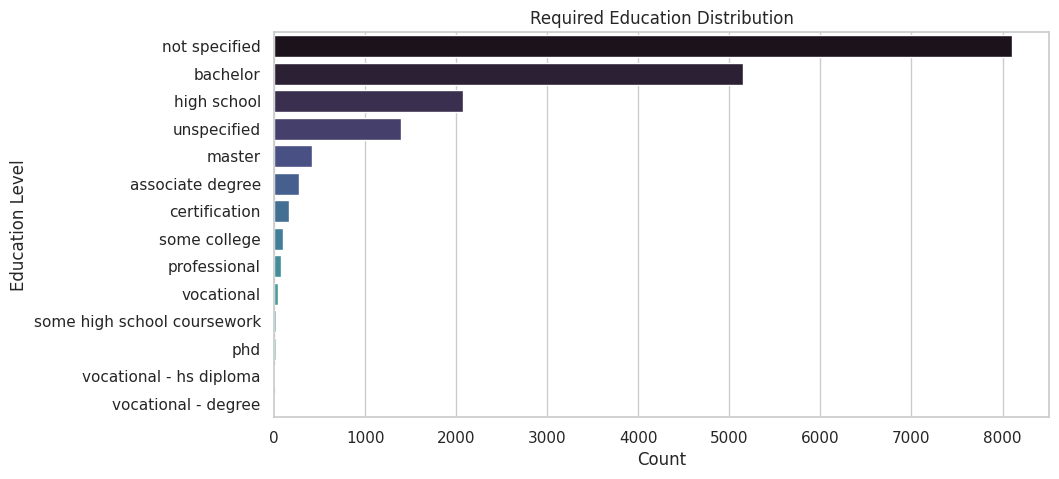

/tmp/ipython-input-3959117414.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='telecommuting', palette='pastel')


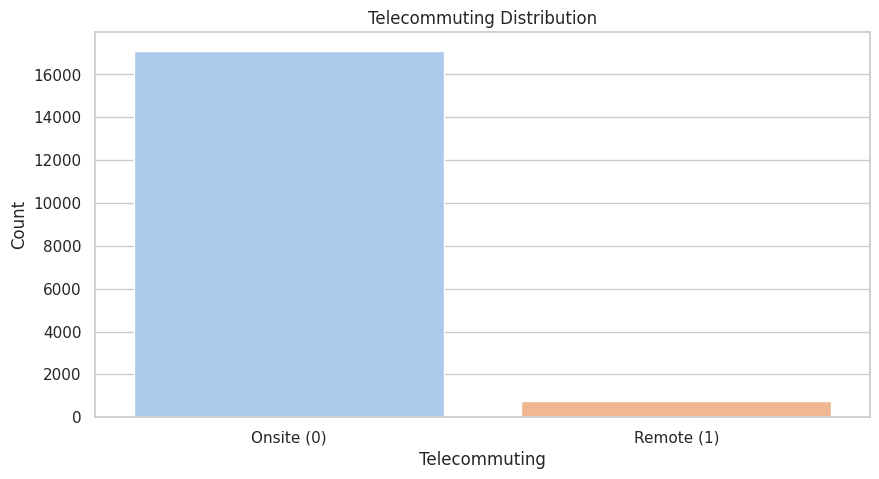

/tmp/ipython-input-3959117414.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='has_company_logo', palette='coolwarm')


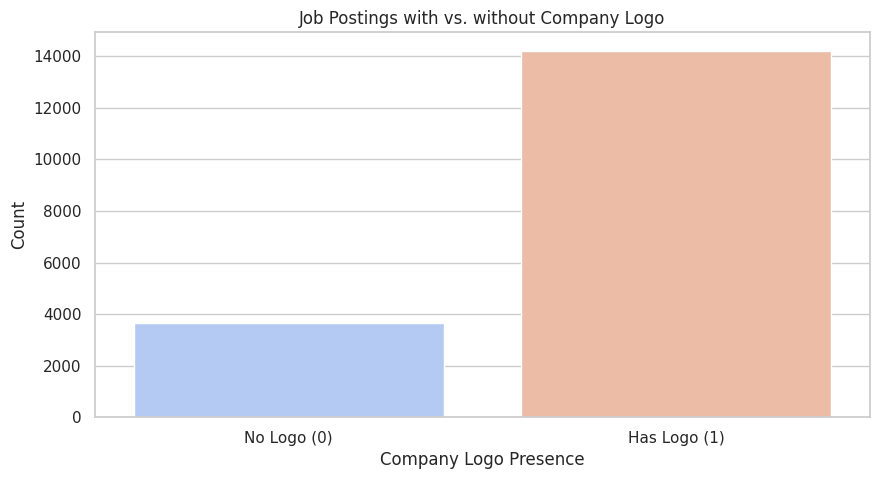

In [5]:
#  EDA – Phase 1: Univariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


#  Target variable distribution
plt.figure()
sns.countplot(data=df, x='fraudulent', palette='Set2')
plt.title("Target Variable: Real vs Fake Job Postings")
plt.xticks([0, 1], ['Real (0)', 'Fake (1)'])
plt.ylabel("Count")
plt.xlabel("Fraudulent")
plt.show()


#  Top 10 Job Titles
plt.figure()
top_titles = df['title'].value_counts().head(10)
sns.barplot(x=top_titles.values, y=top_titles.index, palette='Blues_d')
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Frequency")
plt.ylabel("Job Title")
plt.show()


#  Employment Type
plt.figure()
sns.countplot(data=df, y='employment_type', order=df['employment_type'].value_counts().index, palette='viridis')
plt.title("Employment Type Distribution")
plt.xlabel("Count")
plt.ylabel("Employment Type")
plt.show()


#  Education
plt.figure()
sns.countplot(data=df, y='required_education', order=df['required_education'].value_counts().index, palette='mako')
plt.title("Required Education Distribution")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()

#  Telecommuting vs Onsite
plt.figure()
sns.countplot(data=df, x='telecommuting', palette='pastel')
plt.title("Telecommuting Distribution")
plt.xticks([0, 1], ['Onsite (0)', 'Remote (1)'])
plt.xlabel("Telecommuting")
plt.ylabel("Count")
plt.show()

#  Has Company Logo
plt.figure()
sns.countplot(data=df, x='has_company_logo', palette='coolwarm')
plt.title("Job Postings with vs. without Company Logo")
plt.xticks([0, 1], ['No Logo (0)', 'Has Logo (1)'])
plt.xlabel("Company Logo Presence")
plt.ylabel("Count")
plt.show()


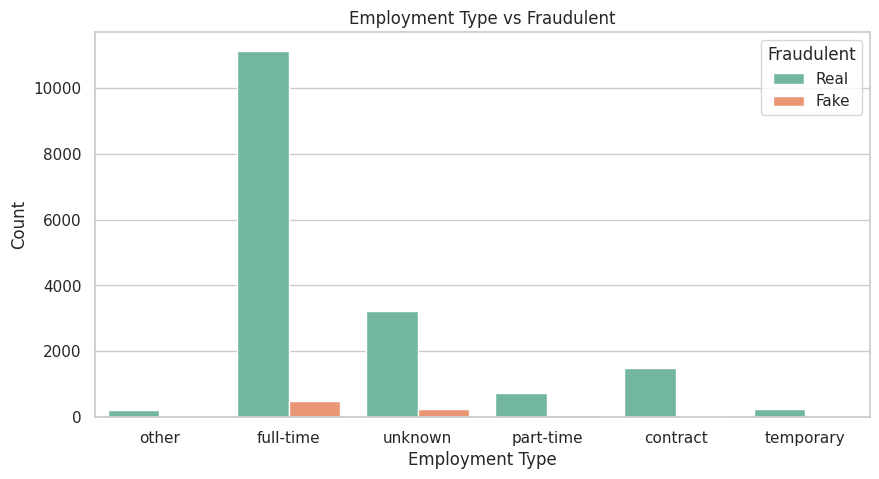

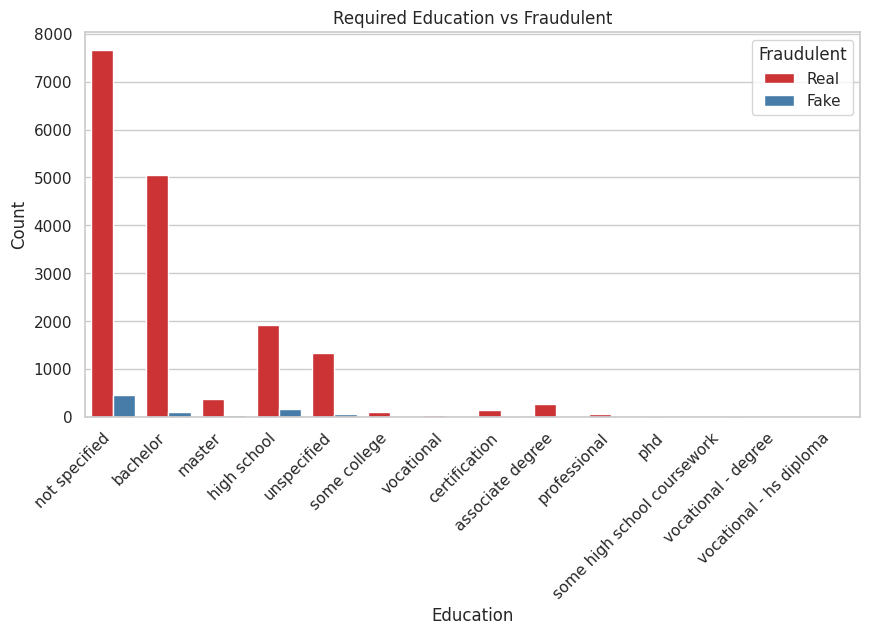

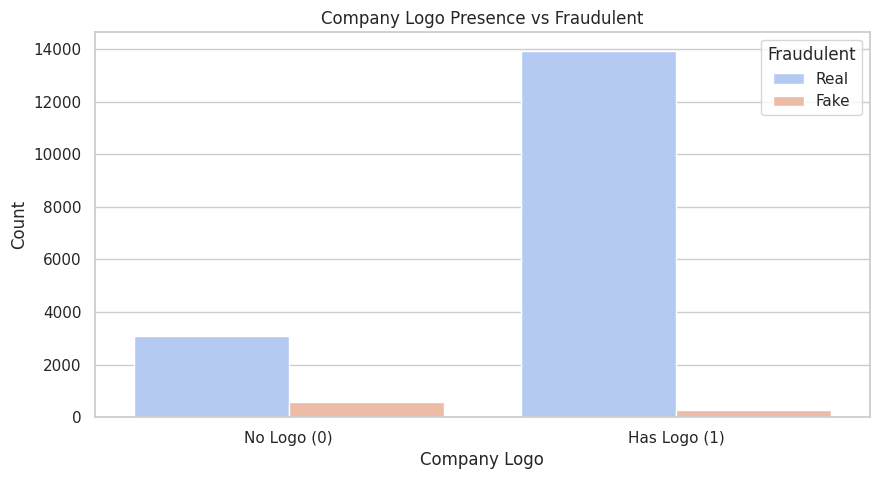

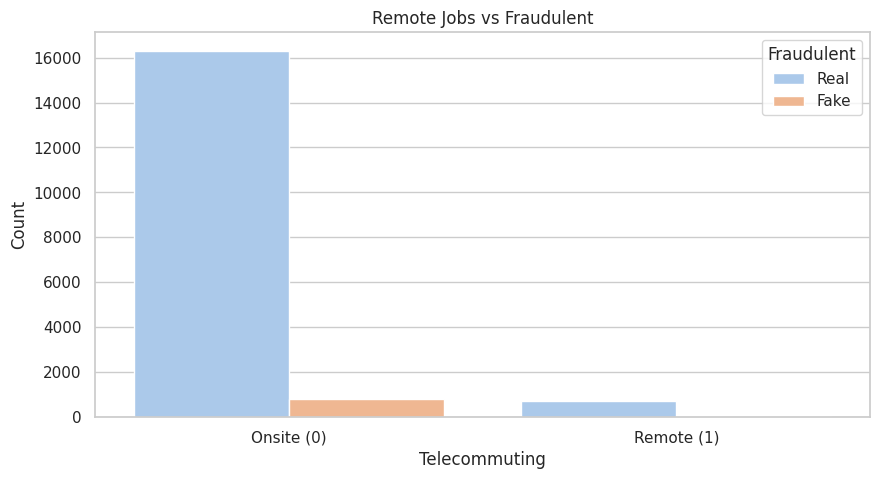

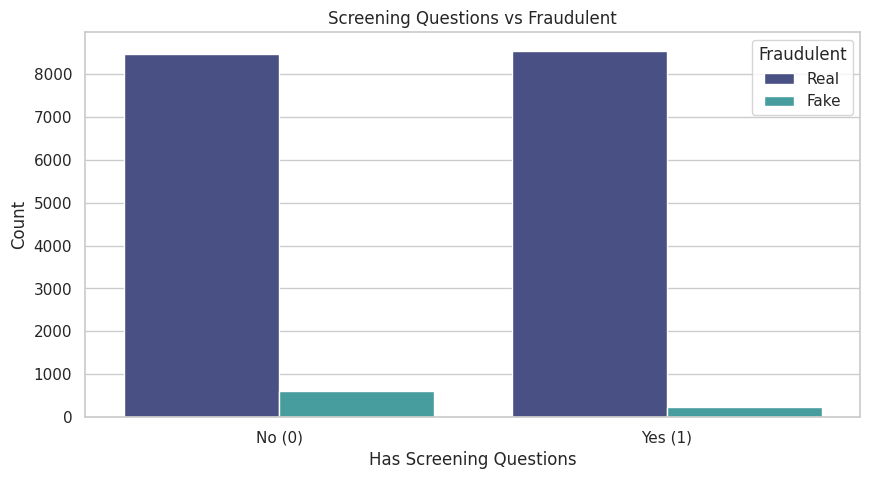

In [6]:
# EDA Phase 2 – Bivariate Analysis: Feature vs Fraudulent

# Load seaborn & matplotlib again if needed
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


# 1. Employment Type vs Fraudulent
plt.figure()
sns.countplot(data=df, x='employment_type', hue='fraudulent', palette='Set2')
plt.title("Employment Type vs Fraudulent")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.legend(title="Fraudulent", labels=["Real", "Fake"])
plt.show()

# 2. Required Education vs Fraudulent
plt.figure()
sns.countplot(data=df, x='required_education', hue='fraudulent', palette='Set1')
plt.title("Required Education vs Fraudulent")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Education")
plt.ylabel("Count")
plt.legend(title="Fraudulent", labels=["Real", "Fake"])
plt.show()

# 3. Has Company Logo vs Fraudulent
plt.figure()
sns.countplot(data=df, x='has_company_logo', hue='fraudulent', palette='coolwarm')
plt.title("Company Logo Presence vs Fraudulent")
plt.xticks([0, 1], ['No Logo (0)', 'Has Logo (1)'])
plt.xlabel("Company Logo")
plt.ylabel("Count")
plt.legend(title="Fraudulent", labels=["Real", "Fake"])
plt.show()

# 4. Telecommuting vs Fraudulent
plt.figure()
sns.countplot(data=df, x='telecommuting', hue='fraudulent', palette='pastel')
plt.title("Remote Jobs vs Fraudulent")
plt.xticks([0, 1], ['Onsite (0)', 'Remote (1)'])
plt.xlabel("Telecommuting")
plt.ylabel("Count")
plt.legend(title="Fraudulent", labels=["Real", "Fake"])
plt.show()

# 5. Has Questions vs Fraudulent
plt.figure()
sns.countplot(data=df, x='has_questions', hue='fraudulent', palette='mako')
plt.title("Screening Questions vs Fraudulent")
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.xlabel("Has Screening Questions")
plt.ylabel("Count")
plt.legend(title="Fraudulent", labels=["Real", "Fake"])
plt.show()
